In [55]:
# For each pixel, if it is isolated, then I claim it's an outlier
# non-adaptive interpolation method, depending on the surrounding pixels

def unimportant_list_extraction(img,percentage):
    index = np.percentile(img,[percentage])
    itemindex = np.where(img<=index)
    outliers = []
    x = itemindex[1]
    y = itemindex[0]
    unimportant_list = list(zip(x, y))
    return unimportant_list

def outlier_detect(unimportant_list):
    outliers = []
    for a in unimportant_list:
        a_left = (a[0]-1, a[1])
        a_right = (a[0]+1, a[1])
        a_top = (a[0], a[1]-1)
        a_bottom = (a[0], a[1]+1)
        if a_left not in unimportant_list and a_right not in unimportant_list and a_top not in unimportant_list and a_bottom not in unimportant_list:
            outliers.append(a)
    return outliers
    
def interpolation(unimportant_list):
    all_points = list((x,y) for y in range(28) for x in range(28))
    for i in unimportant_list:
        all_points.remove(i)
    unimportant_ones = []
    for a in all_points:
        a_left = (a[0]-1, a[1])
        a_right = (a[0]+1, a[1])
        a_top = (a[0], a[1]-1)
        a_bottom = (a[0], a[1]+1)
        if a_left in unimportant_list and a_right in unimportant_list and a_top in unimportant_list and a_bottom in unimportant_list:
            unimportant_ones.append(a)
    return unimportant_ones


def unimportant_final(img, index):
    unimportant_list = unimportant_list_extraction(img, index)
    outliers = outlier_detect(unimportant_list)
    for outlier in outliers:
        unimportant_list.remove(outlier)
    unimportant_ones = interpolation(unimportant_list)
    if unimportant_ones != []:
        return np.concatenate((unimportant_list, unimportant_ones))
    return np.array(unimportant_list)

    
def collect_info(x_train, unimportan_list, model, x_test, y_test):

    x_train[:, unimportan_list[:, 0], unimportan_list[:,1]] = 0
    x_test[:, unimportan_list[:, 0], unimportan_list[:,1]] = 0
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[earlycp])
    return history.history['val_accuracy'][-1]


    
def collect_info_rf(x_train, unimportan_list, model, x_test, y_test):

    x_train[:, unimportan_list[:, 0], unimportan_list[:,1]] = 0
    x_test[:, unimportan_list[:, 0], unimportan_list[:,1]] = 0
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    
    model.fit(x_train, y_train)
    
    preds = model.predict(x_test)
    
    return accuracy_score(y_test,preds)

In [79]:
import tensorflow as tf
import numpy as np
num_classes = 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [34]:
from keras.models import Sequential
from keras.layers import Dense

def make_model():
    model = Sequential()
    model.add(Dense(512, input_dim=28*28, activation='relu', name='Hidden-1'))
    model.add(Dense(256, activation='relu', name='Hidden-2'))
    model.add(Dense(10, activation='softmax', name='Output'))
    return model

In [17]:
batch_size = 128

epochs = 500

earlycp = tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', min_delta=0, patience=5, verbose=0,
        mode='auto', baseline=None, restore_best_weights=False
    )



print(np.shape(y_train))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[earlycp])


(60000, 10)
Epoch 1/500
469/469 [==============================] - 2s 3ms/step - loss: 0.2273 - accuracy: 0.9340 - val_loss: 0.1105 - val_accuracy: 0.9634
Epoch 2/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9757 - val_loss: 0.0796 - val_accuracy: 0.9744
Epoch 3/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0702 - val_accuracy: 0.9778
Epoch 4/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0590 - val_accuracy: 0.9817
Epoch 5/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0740 - val_accuracy: 0.9795
Epoch 6/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0680 - val_accuracy: 0.9815
Epoch 7/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0806 - val_accu

/var/folders/92/lnpv663963531g350q66gj300000gn/T/ipykernel_68946/2378982151.py:11: RuntimeWarning: invalid value encountered in true_divide
  img = img/(weights_std*img_abs)


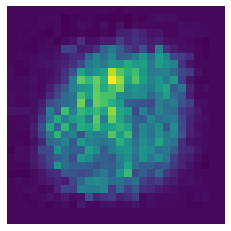

In [23]:
import matplotlib.pyplot as plt

# load results from saved file
file = open('weights_constraints_all_image.txt', "rb")
# read the file to numpy array
arr1 = np.load(file)
# close the file
img = sum(arr1)/800
weights_std = np.std(arr1, axis=0)
img_abs = abs(img-1)
img = img/(weights_std*img_abs)
img = np.nan_to_num(img)
plt.imshow(img)
# plt.colorbar(img)
plt.axis('off')
plt.show()


In [76]:
percent = range(10,100,10)
acc_list = []
for i in percent:
    model = RandomForestClassifier(max_depth=10)
    num_classes = 10
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)


    
    final_list = unimportant_final(img, i)
    
    acc = collect_info_rf(x_train, final_list, model, x_test, y_test)
    acc_list.append(acc)

In [77]:
acc_list

[0.9476, 0.9479, 0.9476, 0.9472, 0.9483, 0.9481, 0.9444, 0.9262, 0.8737]

In [74]:
model = RandomForestClassifier(max_depth=10)
model.fit(x)

RandomForestClassifier(max_depth=2)

In [39]:
# ANN results

[0.9832000136375427,
 0.9832000136375427,
 0.9818999767303467,
 0.98089998960495,
 0.9829999804496765,
 0.9824000000953674,
 0.978600025177002,
 0.9750000238418579,
 0.9394000172615051]

In [89]:
from sklearn.cluster import MiniBatchKMeans
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [90]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [92]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print (Y[:20])

[3 0 4 1 9 2 1 3 1 7 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [94]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [96]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
metrics.accuracy_score(y_test, predicted_labels)

Accuracy: 0.9006



In [107]:
def collect_info_kmeans(x_train, y_train, unimportan_list, model, x_test, y_test):

    x_train[:, unimportan_list[:, 0], unimportan_list[:,1]] = 0
    x_test[:, unimportan_list[:, 0], unimportan_list[:,1]] = 0
    

    X = x_train.reshape(len(x_train),-1)
    X = X.astype(float) / 255.
    Y = y_train
    model.fit(X)
    
    cluster_labels = infer_cluster_labels(kmeans, Y)

    # predict labels for testing data
    test_clusters = kmeans.predict(X_test)
    predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    print(metrics.accuracy_score(y_test, predicted_labels))
    # calculate and print accuracy
    
    
    return metrics.accuracy_score(y_test, predicted_labels)

In [108]:
percent = range(10,100,10)
acc_list_kmeans = []
for i in percent:
    kmeans = MiniBatchKMeans(n_clusters = 256)
    
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    
# normalize the data to 0 - 1
    final_list = unimportant_final(img, i)
    
    acc = collect_info_kmeans(x_train, y_train, final_list, kmeans, x_test, y_test)
    acc_list_kmeans.append(acc)

0.8921
0.9008
0.896
0.8981
0.9028
0.8936
0.8986
0.8776
0.7665


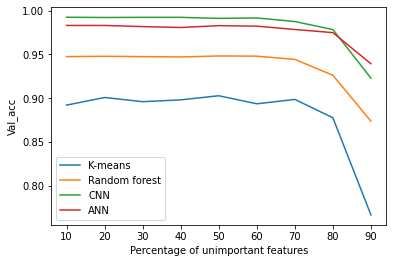

In [121]:
# Plot curve

x = percent 
# Plotting the Graph
plt.plot(x, acc_list_kmeans, label = "K-means")
plt.plot(x, acc_rf, label = "Random forest")
plt.plot(x, acc_cnn, label = "CNN")
plt.plot(x, acc_ann, label = "ANN")
plt.legend()
plt.xlabel("Percentage of unimportant features")
plt.ylabel("Val_acc")
plt.savefig(f'./unimportant_results/all/image_plot_comp', dpi = 300, bbox_inches='tight')


In [109]:
acc_list_kmeans

[0.8921, 0.9008, 0.896, 0.8981, 0.9028, 0.8936, 0.8986, 0.8776, 0.7665]

In [113]:
acc_rf = acc_list

In [ ]:
acc_list_kmeans

In [116]:
acc_ann=[0.9832000136375427,
 0.9832000136375427,
 0.9818999767303467,
 0.98089998960495,
 0.9829999804496765,
 0.9824000000953674,
 0.978600025177002,
 0.9750000238418579,
 0.9394000172615051]

In [117]:
acc_cnn=[0.9926000237464905,
 0.9922999739646912,
 0.9925000071525574,
 0.9925000071525574,
 0.9912999868392944,
 0.9918000102043152,
 0.9876999855041504,
 0.9785000085830688,
 0.9229000210762024]

In [ ]:
acc_resnet = [11.43, 11.44, 11.60, 11.71, 11.75, 11.80, 11.99, 12.20, 12.78]
acc_vgg = [11.63, 11.62, 11.72, 11.65, 11.65, 11.82, 11.73, 11.84, 11.88]
acc_alex = [11.52, 12.29, 12.36, 12.25, 12.24, 12.69, 12.27, 12.72, 12.83]